In [99]:
from sklearn.metrics import mean_squared_error
from math import sqrt # rms = sqrt(mean_squared_error(y_true, y_predicted))
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# linear regression models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor,GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet,BayesianRidge
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 15, 6
# cross val, k-folds
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error
from sklearn.pipeline import make_pipeline
import re
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
from math import sqrt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.dates as mdates
import seaborn as sns
import numpy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from datetime import datetime
%matplotlib inline
def parse(x):
    return datetime.strptime(x, '%Y %M')
#df = pd.read_csv('bcp.csv')
k = pd.read_csv('it.csv')
k['Month']=k.Month.fillna(k.Month.mode())
k=k.dropna()
k.Month.unique()
meta_dict = { 'January':int, 'February':int, 'March':int, 'April':int,'May':int,'June':int,'July':int,'August':int,'September':int,'October':int,'November':int,'December':int}
my_dict = {'January':"1", 'February':"2", 'March':"3", 'April':"4",'May':"5",'June':"6",'July':"7",'August':"8",'September':"9",'October':"10",'November':"11",'December':"12"}  # adding a string key for the demo

d= { k:meta_dict.get(k,str)(v) for k,v in my_dict.items()}

k.Month = k.Month.map(d)

k.Benchmark_Price=k.Benchmark_Price.astype(float)

In [100]:
k.Month=k['Month'].fillna(0).astype(int)
k

,Unnamed: 0,1 Month,1 Year,10 Year,3 Month,3 Year,5 Year,6 Month,Area,Benchmark_Price,Month,Price,Property Type,Year
1992,0,1.60%,6.90%,65.30%,4.40%,7.20%,13.40%,4.70%,Lower Mainland,594500.0,4,167.6,Residential / Composite,2015
1993,1,1.90%,8.50%,73.30%,4.90%,8.40%,16.20%,5.40%,Greater Vancouver,673000.0,4,176.1,Residential / Composite,2015
1994,2,0.60%,4.20%,26.40%,2.50%,-3.90%,-4.70%,1.20%,Bowen Island,595500.0,4,129.1,Residential / Composite,2015
1995,3,3.20%,9.00%,72.80%,7.90%,10.60%,16.10%,6.10%,Burnaby East,635400.0,4,175.4,Residential / Composite,2015
1996,4,1.70%,8.60%,69.20%,5.80%,9.40%,15.70%,5.80%,Burnaby North,571000.0,4,171.6,Residential / Composite,2015
1997,5,1.50%,7.80%,74.80%,3.90%,8.00%,17.30%,4.70%,Burnaby South,626900.0,4,177.2,Residential / Composite,2015
1998,6,2.30%,9.40%,65.20%,4.40%,11.80%,17.00%,5.00%,Coquitlam,565200.0,4,167.2,Residential / Composite,2015
1999,7,3.40%,11.20%,64.10%,6.00%,7.60%,15.70%,6.50%,Ladner,594600.0,4,165.4,Residential / Composite,2015
2000,8,0.60%,4.80%,35.90%,1.90%,3.60%,0.40%,3.10%,Maple Ridge,405500.0,4,137.0,Residential / Composite,2015
2001,9,1.60%,4.60%,64.80%,3.30%,4.40%,9.60%,2.50%,New Westminster,393500.0,4,167.6,Residential / Composite,2015


In [101]:
k.Month.isnull().sum()
k.Month=k.Month.astype(int)

In [102]:
k.Month.dtype
k.to_csv('mydatapot.csv')

In [103]:
dataset = pd.read_csv('mydatapot.csv',  parse_dates = [['Year', 'Month']], index_col=0, date_parser=parse)

In [105]:
dataset

,Unnamed: 0,Unnamed: 0.1,1 Month,1 Year,10 Year,3 Month,3 Year,5 Year,6 Month,Area,Benchmark_Price,Price,Property Type
Year_Month,,,,,,,,,,,,,
2015-01-01 00:04:00,1992,0,1.60%,6.90%,65.30%,4.40%,7.20%,13.40%,4.70%,Lower Mainland,594500.0,167.6,Residential / Composite
2015-01-01 00:04:00,1993,1,1.90%,8.50%,73.30%,4.90%,8.40%,16.20%,5.40%,Greater Vancouver,673000.0,176.1,Residential / Composite
2015-01-01 00:04:00,1994,2,0.60%,4.20%,26.40%,2.50%,-3.90%,-4.70%,1.20%,Bowen Island,595500.0,129.1,Residential / Composite
2015-01-01 00:04:00,1995,3,3.20%,9.00%,72.80%,7.90%,10.60%,16.10%,6.10%,Burnaby East,635400.0,175.4,Residential / Composite
2015-01-01 00:04:00,1996,4,1.70%,8.60%,69.20%,5.80%,9.40%,15.70%,5.80%,Burnaby North,571000.0,171.6,Residential / Composite
2015-01-01 00:04:00,1997,5,1.50%,7.80%,74.80%,3.90%,8.00%,17.30%,4.70%,Burnaby South,626900.0,177.2,Residential / Composite
2015-01-01 00:04:00,1998,6,2.30%,9.40%,65.20%,4.40%,11.80%,17.00%,5.00%,Coquitlam,565200.0,167.2,Residential / Composite
2015-01-01 00:04:00,1999,7,3.40%,11.20%,64.10%,6.00%,7.60%,15.70%,6.50%,Ladner,594600.0,165.4,Residential / Composite
2015-01-01 00:04:00,2000,8,0.60%,4.80%,35.90%,1.90%,3.60%,0.40%,3.10%,Maple Ridge,405500.0,137.0,Residential / Composite


In [106]:
df=dataset[['Area','Benchmark_Price','Property Type']]

In [107]:
df_east=df[df['Area']=='Vancouver East']

In [108]:
df_east=df_east[df_east['Property Type']=='Apartment']

In [109]:
df_east=df_east.reset_index()

In [110]:
df_east = df_east.set_index('Year_Month')
df_east.index

DatetimeIndex(['2015-01-01 00:04:00', '2015-01-01 00:08:00',
               '2015-01-01 00:12:00', '2015-01-01 00:02:00',
               '2015-01-01 00:07:00', '2015-01-01 00:06:00',
               '2015-01-01 00:03:00', '2015-01-01 00:05:00',
               '2015-01-01 00:11:00', '2015-01-01 00:10:00',
               '2015-01-01 00:09:00', '2016-01-01 00:04:00',
               '2016-01-01 00:08:00', '2016-01-01 00:12:00',
               '2016-01-01 00:00:00', '2016-01-01 00:01:00',
               '2016-01-01 00:07:00', '2016-01-01 00:06:00',
               '2016-01-01 00:03:00', '2016-01-01 00:05:00',
               '2016-01-01 00:11:00', '2016-01-01 00:10:00',
               '2016-01-01 00:09:00', '2017-01-01 00:04:00',
               '2017-01-01 00:08:00', '2017-01-01 00:12:00',
               '2017-01-01 00:02:00', '2017-01-01 00:01:00',
               '2017-01-01 00:07:00', '2017-01-01 00:06:00',
               '2017-01-01 00:03:00', '2017-01-01 00:05:00',
               '2017-01-

,Benchmark_Price
Year_Month,
2015-01-01 00:04:00,318700.0
2015-01-01 00:08:00,331400.0
2015-01-01 00:12:00,364500.0
2015-01-01 00:02:00,318500.0
2015-01-01 00:07:00,330300.0
2015-01-01 00:06:00,330300.0
2015-01-01 00:03:00,316300.0
2015-01-01 00:05:00,322300.0
2015-01-01 00:11:00,360900.0


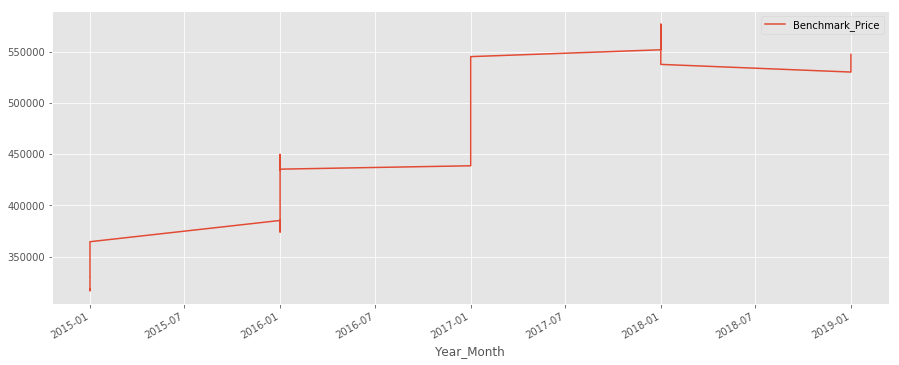

In [111]:
df_east=df_east[['Benchmark_Price']]
df_east.plot(figsize=(15, 6))
df_east

In [112]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df_east.Benchmark_Price, model='additive')
fig = decomposition.plot()
plt.show()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

In [113]:
y=df_east.Benchmark_Price
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2539      0.454      0.559      0.576      -0.636       1.144
ma.L1         -0.7477      0.389     -1.922      0.055      -1.510       0.015
ar.S.L12      -0.0039      0.243     -0.016      0.987      -0.481       0.473
sigma2      1.438e+09   3.26e-10   4.41e+18      0.000    1.44e+09    1.44e+09


/opt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


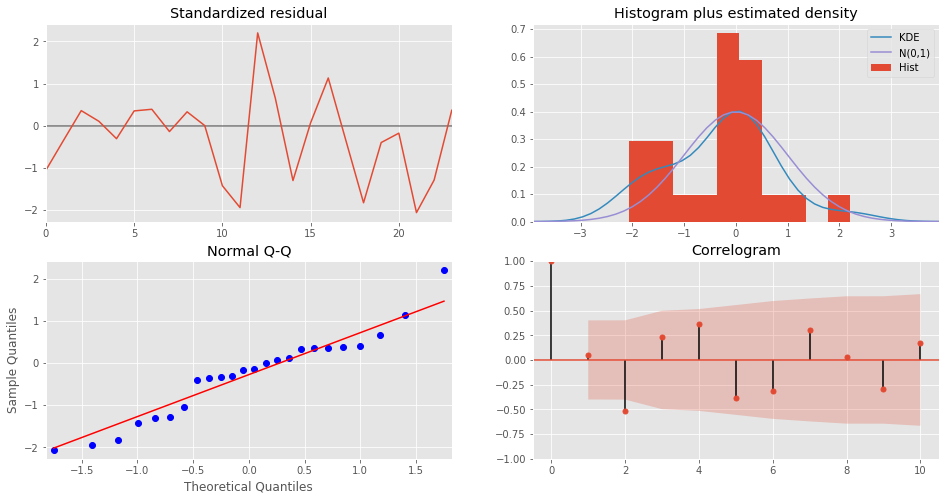

In [114]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [116]:
pred = results.get_prediction(start='2015-01-01 00:04:00',ynamic=False)


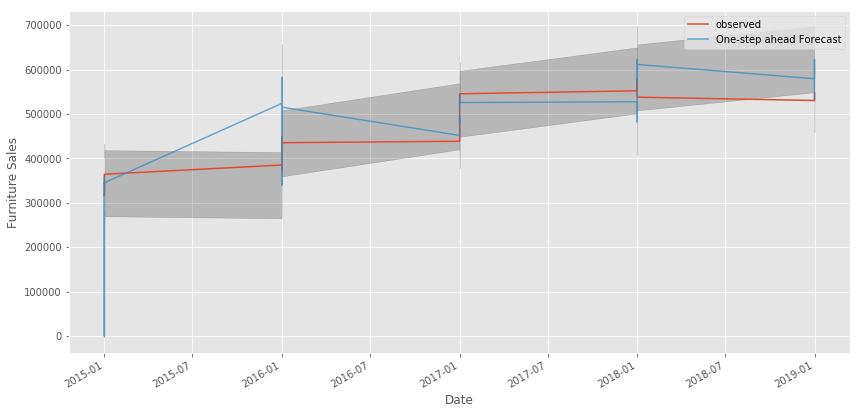

In [117]:
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

In [44]:
results

In [118]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1386684222.76


In [119]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 37238.21


In [121]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: view limit minimum -36800.50010416667 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f9c61cb20d0> (for post_execute):


ValueError: view limit minimum -36800.50010416667 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36800.50010416667 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1008x504 with 1 Axes>